# Task 1 - Prediction Using Supervised Machine Learning

Problem:

Q1. Predict the percentage of the student on the basis of number of hours studied by the student.


Q2. What will be predicted score if a student studies for 9.25 hrs/ day?

# step1 - Importing and checking  data 

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Importing dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# step2 -  Data Visualization

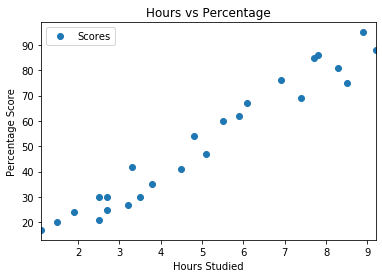

In [8]:
# Plotting the dataset(Scatter Plot)
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph between number of "Hours" and the "Percentage score", We can clearly observe that their is a linear relationship between them, also here we have only two variables 
So, we are using the simple Linear Regression Supervised machine learning model on it to predict the output.

# Step 3 - Data Preperation

We are separationg the dataset into "attributes" (inputs) and "labels" (outputs). After that we will split the whole dataset into two Parts - Training dataset and Testing dataset.

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# step 4 - Training the Simple Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# step5 - Visualizing the results

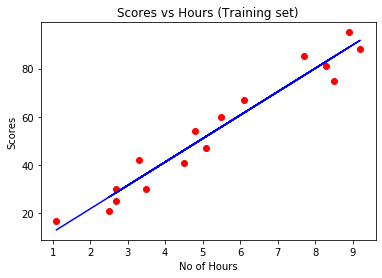

In [12]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Scores vs Hours (Training set)')
plt.xlabel('No of Hours')
plt.ylabel('Scores')
plt.show()

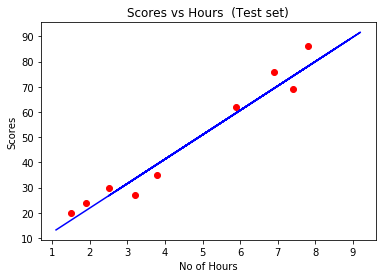

In [13]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Scores vs Hours  (Test set)')
plt.xlabel('No of Hours')
plt.ylabel('Scores')
plt.show()

# step6 - predicting the results

In [14]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [15]:
#Now Comparing the Predicted Score with Actual Score
df= pd.DataFrame({'Predicted Score': y_pred, 'Actual Score': y_test})
df

,Predicted Score,Actual Score
0,17.042892,20
1,33.516954,27
2,74.217577,69
3,26.733516,30
4,59.681640,62
5,39.331329,35
6,20.919142,24
7,78.093827,86
8,69.372265,76


In [16]:
print(regressor.predict([[9.25]]))

[92.14523315]


Therefore, our model predicts that the predicted score for student studied 9.25 hr/day will be 92.14523314523314 

# Step - 7 Evaluation of the Model

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.691397441397438


# Getting the final linear regression equation with the values of the coefficients

In [18]:
print(regressor.coef_)
print(regressor.intercept_)

[9.69062469]
2.5069547569547623


Therefore, the equation of our simple linear regression model is:

                         Scores = 9.69062469×(No of Hours) + 2.5069547569547623